In [0]:
"""
In this notebook i create a trending dataset.
I will check if data is statonary with trending set
and then I detrend the set and check again.
I will use Adfuller test.

https://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.adfuller.html

"""
import numpy as np
import matplotlib.pyplot as plt

def plot_series(serie,label):
  plt.plot(serie)
  plt.ylabel(label)
  plt.show()


#Yt = α + βt + εt
def deterministic_trend(begin,variance,sample_size,drift,trend):
  items = []
  x = begin
  for i in range(sample_size):
    noise = (np.random.randint(variance * -10,variance * 10, size=1)/10)[0]
    x =  i * trend + noise + drift
    items.append(x)
  return np.array(items)    

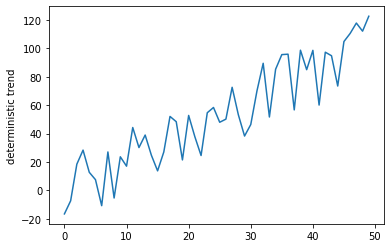

array([-16.5,  -7.3,  18.5,  28.4,  12.8,   7.6, -10.7,  27.1,  -5.3,
        23.7,  17.1,  44.3,  30.2,  39. ,  24.8,  13.8,  27.1,  52.1,
        48.4,  21.5,  52.8,  37.8,  24.6,  54.7,  58.4,  48. ,  50.2,
        72.6,  53.3,  38.3,  46.4,  70.1,  89.5,  51.7,  85.3,  95.6,
        95.9,  56.7,  98.7,  85. ,  98.6,  60.1,  97.3,  94.8,  73.5,
       104.8, 110.5, 117.8, 112.1, 122.6])

In [15]:
sample_size = 50
deterministic_trend_set = deterministic_trend(begin=4,variance=25,sample_size=sample_size,drift=2,trend =2)
plot_series(deterministic_trend_set,"deterministic trend")
deterministic_trend_set

In [0]:
X = [i for i in range(0, len(deterministic_trend_set))]
X = np.reshape(X, (len(deterministic_trend_set), 1))
y = deterministic_trend_set

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
print("coefficients",model.coef_)
print("intercept",model.intercept_)

coefficients [2.28537335]
intercept -2.905647058823547


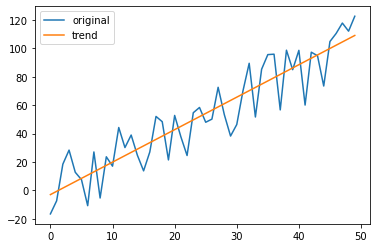

In [37]:
plt.plot(y,label="original")
plt.plot(trend,label="trend")
plt.legend()
plt.show()

mean 1.1510792319313624e-14
var 212.41215122208882


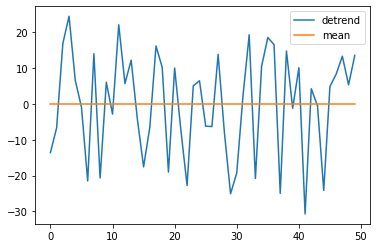

In [47]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(deterministic_trend_set))]
# plot detrended
print("mean",np.mean(detrended))
print("var",np.var(detrended))
plt.plot(detrended,label="detrend")
plt.plot([mean for i in range(0, len(deterministic_trend_set))],label="mean")

plt.legend()
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
"""
The hypotheses for the test:

The null hypothesis for this test is that there is a unit root.
The  alternate is that the time series is stationary (or trend-stationary).

"""
def check_stationary(serie):
  print("mean",np.mean(serie))
  print("var",np.var(serie))
  result = adfuller(serie)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])



In [32]:
check_stationary(X.reshape(X.shape[0]))
#X is original set, so not stationary p value so high,so we can NOT reject null hypothesis

mean 24.5
var 208.25
ADF Statistic: 0.000000
p-value: 0.958532


In [33]:
check_stationary(detrended)
#detrended has removed the trend effect , so  stationary p value so low,so we can  reject null hypothesis

mean 1.1510792319313624e-14
var 212.41215122208882
ADF Statistic: -4.575177
p-value: 0.000143
